<h1> Insulin protein network </h1>
    

- In this notebook you will apply the functions from the ***previous notebook*** to a protein-protein interaction network and a few more concepts and how to manipulate graphs in python.

Relevant literature:

<a href="https://www.nature.com/articles/s41467-019-09177-y"> Network-based prediction of protein interactions </a>

### Import libraries

In [7]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings

import csv
from operator import itemgetter

import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF


warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading data¶

- Load the two csv files: 
        insulinnetwork_nodelist.csv (contains names on protein) 
        insulinnetwork_edgelist.cvs (contains the protein-protein interactions and an interaction scores)

`Pandas.read_csv` is the easiest way to do this.

In [8]:
nodes = pd.read_csv('data/insulinnetwork_nodelist.csv')
nodes = nodes.Name.values # returns array of the values in column "Name"

In [9]:
edges = pd.read_csv('data/insulinnetwork_edgelist.csv')
edges = [(row['Source'], row['Target']) for idx,row in edges.iterrows()] # make a pair for values in each row

Inspect our objects, then use them to construct a networkX graph:

In [10]:
print(nodes)
print('-------------')
print(edges)

['AKT1' 'EGF' 'GCG' 'IGF1' 'IGF1R' 'INS' 'INSR' 'IRS1' 'IRS2' 'PTPN1'
 'RPS6KB1']
-------------
[('IRS1', 'INSR'), ('INS', 'INSR'), ('PTPN1', 'IGF1R'), ('IGF1', 'IGF1R'), ('INS', 'IGF1R'), ('PTPN1', 'INSR'), ('IRS1', 'IGF1R'), ('INS', 'IRS1'), ('INSR', 'IGF1'), ('AKT1', 'INS'), ('IRS1', 'RPS6KB1'), ('INS', 'IGF1'), ('INS', 'IRS2'), ('INSR', 'IGF1R'), ('IRS2', 'IGF1R'), ('AKT1', 'RPS6KB1'), ('IRS1', 'IGF1'), ('IGF1', 'EGF'), ('INS', 'EGF'), ('INS', 'PTPN1'), ('PTPN1', 'IRS1'), ('INS', 'RPS6KB1'), ('AKT1', 'PTPN1'), ('GCG', 'INS'), ('IRS2', 'INSR'), ('IRS2', 'IGF1'), ('AKT1', 'IRS1'), ('IGF1', 'RPS6KB1'), ('AKT1', 'IGF1'), ('IGF1R', 'RPS6KB1'), ('IRS2', 'IRS1'), ('PTPN1', 'EGF'), ('INSR', 'RPS6KB1'), ('AKT1', 'INSR'), ('PTPN1', 'IGF1'), ('IRS2', 'PTPN1'), ('AKT1', 'EGF')]


In [11]:
# create a new graph
G = nx.Graph() 

# add nodes and edges
G.add_nodes_from(nodes) 
G.add_edges_from(edges)

<div class='alert alert-warning'>
    <h4>Exercise 1 </h4>Basic information and drawing the network</h4>
</div>

The network has the protein Insulin as the center of the network. This means that all the other proteins are connected by edges to Insulin, but may also be connected to eachother. This is called an **ego network**.

Answer the question below by applying some of the commands you learned in the previous notebook. To get a high learning output you can type in the codes manually - to save time you can chose to copy-paste them instead. 

<div class='alert alert-warning'>
       <span style=" font-weight: bold;"> 1.a. </span>Display the number of nodes and edges in the network
</div>

In [12]:
# Ex1 a)


In [13]:
# %load solutions/ex2_1a.py

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">1.b.</span> Print the first five edges in the network. Do 'AKT1' and 'EGF' interact?
</div>

In [14]:
# b)


In [15]:
#%load solutions/ex2_1b.py

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">
        1.c. </span>Draw network with labels

In [16]:
# c)


In [17]:
# %load solutions/ex2_1c.py

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">
        1.d.  </span>List the neighbors of 'AKT1'

In [18]:
# d)


In [19]:
# %load solutions/ex2_1d.py

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">
        1.e.  </span>Draw subnetwork for the protein 'AKT1'

In [20]:
# e)


In [21]:
# %load solutions/ex2_1e.py

### Degree centrality

In the notebook <a href='./0_Concepts_in_network_theory.ipynb'>0_Concepts_in_network_theory</a> we introduced some important graph metrics. Centralities are metrics to quantify the importance of the node. Degree centrality represents simply the number of edges the node has.

{'AKT1': 7, 'EGF': 4, 'GCG': 1, 'IGF1': 9, 'IGF1R': 7, 'INS': 10, 'INSR': 8, 'IRS1': 8, 'IRS2': 6, 'PTPN1': 8, 'RPS6KB1': 6}


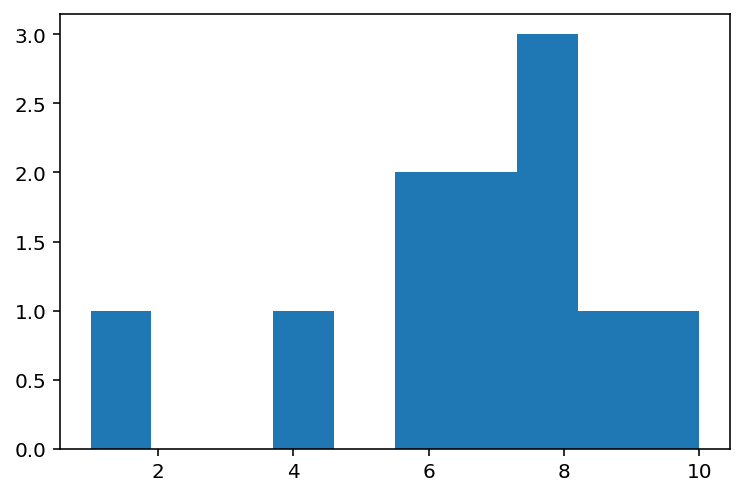

In [22]:
# get the degrees in dictionary format
ds = dict(G.degree)
print(ds)

#access only the values and plot them
plt.hist(ds.values())
plt.show()

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">
        1.f.  </span>Rank top 5 proteins with the highest centrality 

In [23]:
# f)


In [24]:
# %load solutions/ex2_1f.py

<div class='alert alert-warning'>
    <span style=" font-weight: bold;">
        1.g. </span> Plot the network, but the size of the nodes proportional to their degree centrality (number of edges adjacent to the node, high centrality=bigger). </div>
        

**Hint:** Use the arguments `nodelist` and `node_size` in `nx.draw`. *node_size* takes either one value (size for all nodes) or a list as input. The order has to match and that's why using *nodelist* is a good idea.

In [25]:
# g)


In [26]:
# %load solutions/ex2_1g.py

## ECDF

We plot a empirical cumulative density function (ECDF), like in notebook 1. 

*Empirical probability (or cumulative) distributions are used to study the distribution of a parameter or a variable that does not fit a known (e.g. Gaussian) probability distribution.* 

*- The EPDF returns the expected probability for observing a value.*
*- The ECDF returns the expected probability for observing a value less than or equal to a given value.*

*In more practical terms, the ECDF allows you to visualize the values of a feature (in this case the degree of each node in the network) in order from least to greatest and see how this feature is distributed across the network.*

The ECDF returns the expected probability for observing a value less than or equal to a given value.

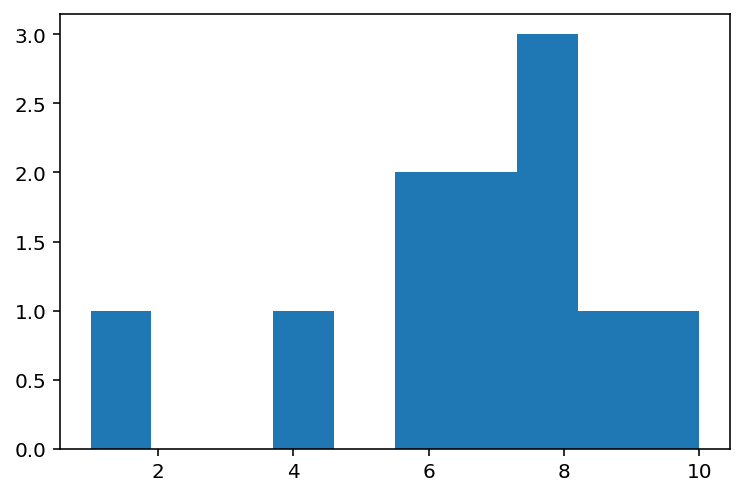

In [27]:
plt.hist(ds.values())
plt.show()

Python library provides the ECDF class for fitting an empirical cumulative distribution function and calculating the cumulative probabilities for specific observations from the domain. 

We will use it to understand the shape of the distribution of the degree values.

Text(0.5, 1.0, 'Degree Centralities')

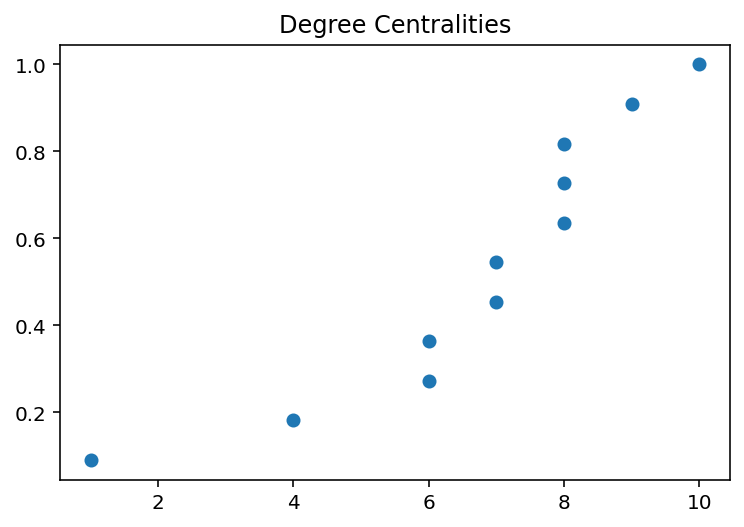

In [28]:
ecdf = ECDF(list(ds.values()))
x,y = ecdf.x, ecdf.y

plt.scatter(x,y)
plt.title('Degree Centralities')

<div class='alert alert-warning'>
    <h4>Exercise 2.</h4> What does the shape of the curve tell you? (answer in words)
</div>

In [29]:
#Ex 2)


In [30]:
# %load solutions/ex2_2.py

## Layout and directions


Now we wants to look at different layout and include directions on the edges.

First we draw a standard graph from our data:

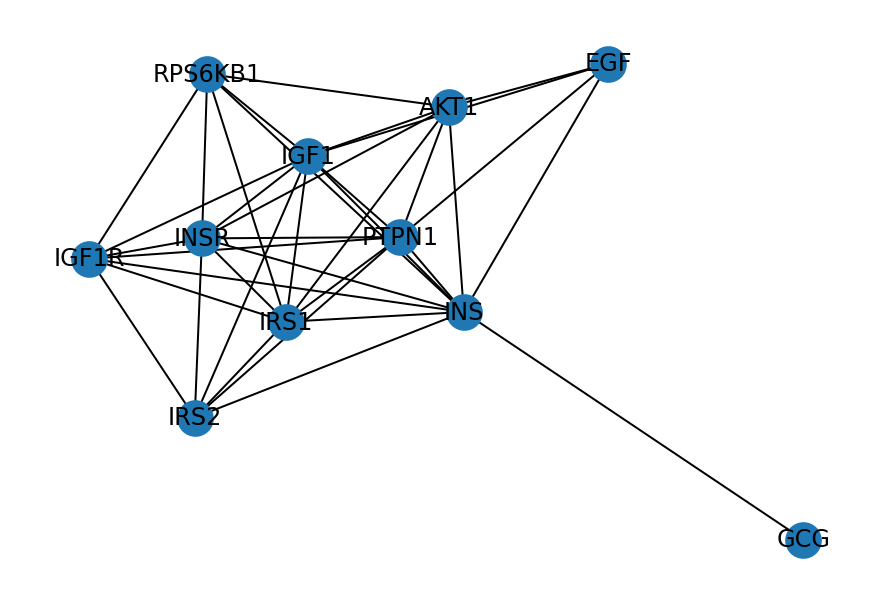

In [31]:
nx.draw(G, with_labels=True)
plt.show()

## Topological versus physical space
Most networks do not "exist" in physical space (e.g. a protein interaction network is an abstract network, while an air travel network has nodes fixed in physical space). But all networks can be said to exist in **topological** space, but the position of the nodes are only a feature of how *we* decide to plot them, not a property of the network itself. A certain layout may simplify the graph and make it easier to analyse and interpret, for example by plotting interacting nodes closer together. We can choose between dozens of different layout algorithms. Here we start by applying the Fruchterman Reingold layout algorithm, which is a force-directed layout.

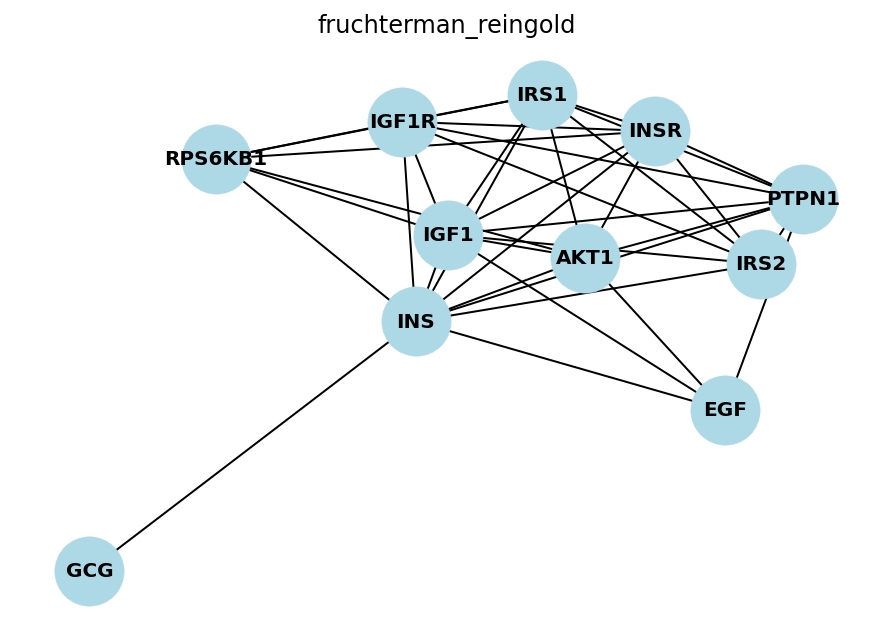

In [32]:
# Fruchterman Reingold
nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=nx.fruchterman_reingold_layout(G))
plt.title("fruchterman_reingold")
plt.show()


You can also try out some of the other layout options in Networkx. Instead of Fruchterman_Reingold try circular, random and spectral.

In [33]:
def plot_graph(G, layout):
    nx.draw(G, node_size=1200, node_color='lightblue',
    linewidths=0.25, font_size=10, font_weight='bold', with_labels=True, pos=layout(G))
    plt.title(layout.__name__)
    plt.show()

<div class='alert alert-warning'>
<h4>Exercise 3. </h4> Use the function above (plot_graph) and try out the 3 different layouts from `nx`: circular, random and spectral.

In [34]:
# Ex3


In [35]:
# %load solutions/ex2_3.py

---
## Directed graphs

In the graphs we have made so far, the direction of the edges were not given. In the previous notebook, if Mads was playing with Anna, then Anna was also playing with Mads. If instead we are dealing with situations were e.g. a protein activate another protein, we would like to add a direction on the relationship - going from the activating protein towards the activated protein. We do that by making a directed graph.

In networkx we use the command `nx.DiGraph()` to indicate that we now want to make a **directed** graph. 

Be aware that one edge can go in both directions, indicated by an arrow in both ends of the edge.

In [36]:
# make a directed graph
G = nx.DiGraph()

# add nodes and eges
G.add_nodes_from(nodes)
G.add_edges_from(edges)

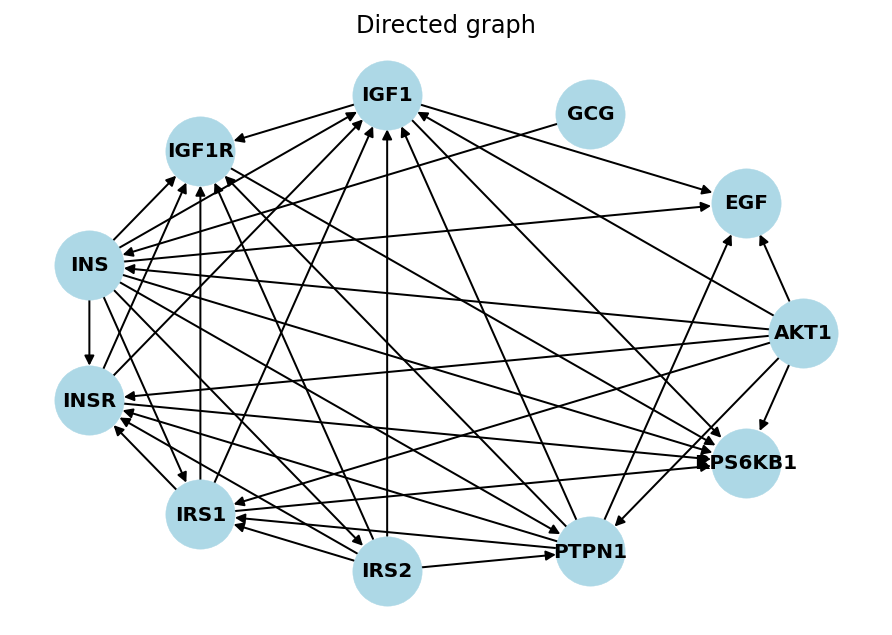

In [37]:
# draw the directed graph
nx.draw(G, node_size=1200, node_color='lightblue',
        linewidths=0.25, font_size=10, 
        font_weight='bold', with_labels=True, 
        pos=nx.circular_layout(G))

plt.title("Directed graph")
plt.show()

<div class='alert alert-warning'>
<h4>Exercise 4:</h4> Now, try to make a directed network with a circular layout, green nodes and where the labels have a white font. 

In [38]:
# Ex4


In [39]:
# %load solutions/ex2_4.py

##  Density, shortest paths and betweenness centrality

We will now introduce a few more terms related to graphs and show how networks can be represented as a plot instead of a graph. 

We start by calculation of the density of the network. Whereas the centrality is connected to the individual nodes, the density is related to the network and describes the **portion of the potential connections** in a network **that are actual connections**, i.e. how many of the potential edges are given in the network:

<div class= "alert alert-info">graph density = <i>no of edges/total no of possible edges</i></div>

For this network we will see that around one sixth of all the potential connections are actually given in the network.

<div class='alert alert-warning'>
    <h4>Exercise 5. </h4>Calculate the density of G. 

In [40]:
# Ex5


In [41]:
# %load solutions/ex2_5.py

Usually we find that there is a method that will do what we are looking for:

In [42]:
nx.density(G)

0.33636363636363636

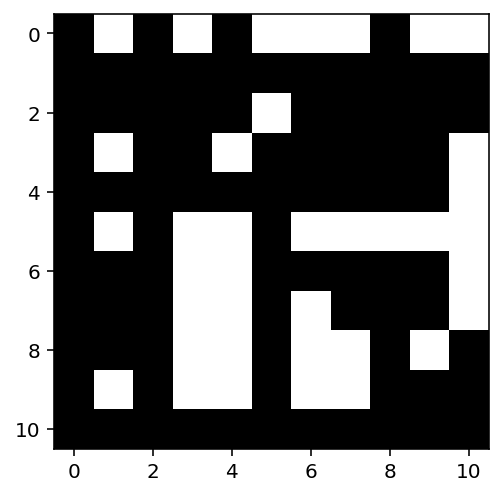

In [43]:
# do you agree that about 1/3 of the squares are white?
npg = nx.to_numpy_array(G)
plt.imshow(npg, cmap='gray')

We can also study the paths through the network. Often we will be most interested in finding the shortest path between two nodes, e.g. the shortest way that a signal can travel from one protein to another. E.g. the shortest path from GCG to EGF. 

In [44]:
nx.shortest_path(G, 'GCG', 'EGF')

['GCG', 'INS', 'EGF']

<div class='alert alert-warning'>
<h4>Exercise 6. </h4> What happens if we take the shortest path the other way around - from EGF to GCG?

In [45]:
# Ex6


In [46]:
# %load solutions/ex2_6.py

<div class='alert alert-warning'>
<h4>Exercise 7.</h4> Change the graph from a directed graph to an undirected graph and then try the same.
    
**Hint.** *Make a new undirected graph passing existing graph as parameter.*
 </div>   



In [47]:
# Ex7


In [48]:
# %load solutions/ex2_7.py

<div class='alert alert-warning'>
Select two arbitrary proteins of your own and find the shortest path between them.

In [49]:
G.nodes

NodeView(('AKT1', 'EGF', 'GCG', 'IGF1', 'IGF1R', 'INS', 'INSR', 'IRS1', 'IRS2', 'PTPN1', 'RPS6KB1'))

In [50]:
# Shortest path from __ to __


---
## Betweennes centrality

Knowing about the concepts of shortest path and centrality, we can now meassure the betweenness centrality. Betweenness centrality is a measure of centrality in a graph based on shortest paths. The **betweenness centrality** for each node (here proteins) **is the number of shortest paths that pass through the node**. 

You can say that the higher betweenness centrality a node has, the more control the node has over the network, because more information will pass through that node. In an ego-centeret network it is expected that the ego (here Insulin) will have the highest betweenness centrality. 

<BarContainer object of 11 artists>

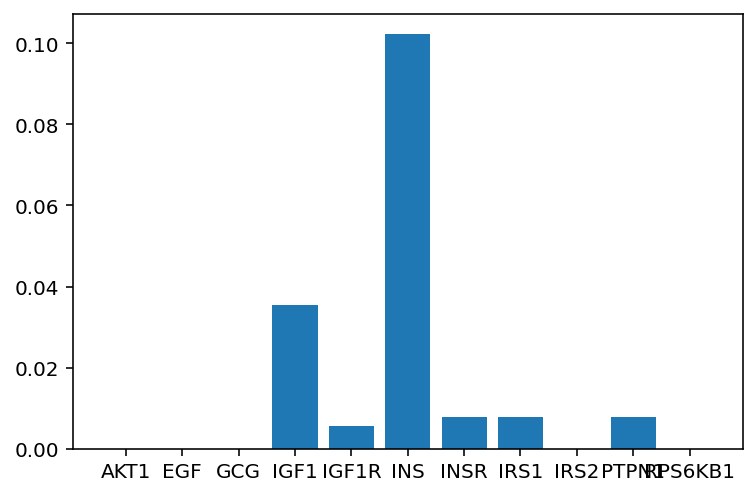

In [51]:
btws = nx.betweenness_centrality(G, normalized=True)

# plot the betweennes of each node
plt.bar(btws.keys(), btws.values())

<div class='alert alert-warning'>
    <h4>Exercise 8.</h4> Which of the proteins in the insulin network has the second highest betweenness centrality?

In [52]:
# 8)


In [53]:
# %load solutions/ex2_8.py

<div class='alert alert-warning'>
    <h4>Extra exercise 1.</h4>

Build a dataframe that contains three centrality scores (degree, betweeness and cluster coefficient) computed for each node.

               Degree  |  Cluster Coefficient | Betweeness
    Node 1 
    Node 2 
    Node 3 

</div>

*Remember the cluster coefficient measures how connected a vertex's neighbors are to one another. It tells you if the vertex's neighbors in a graph tend to cluster together.*

In [54]:
G2 = G.to_undirected()
# plot_graph(G2, nx.circular_layout)

In [55]:
# xEx1)


In [56]:
#%load solutions/ex2_ex1.py

Can you tell why EGF has a low betweeness and a high clustering coefficient?

## Community structure

A network is said to have community structure if the nodes of the network can be easily grouped into sets of nodes such that each set of nodes is densely connected internally.

Perhaps, one can search for non-overlapping communities or groups of nodes with dense connections internally and sparser connections between them. 

There has been an increased interest in unraveling the community structure of biological systems as it may provide important insights into a system’s functional components, such as [molecular pathways](ttps://www.nature.com/articles/s41540-018-0055-2).

### Clique

A clique is a subset of vertices of an undirected graph G such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. In more practical terms, a set of nodes forms a clique (equivalently, a complete subgraph) if all possible connections between nodes exist. A two-node clique is simply two connected nodes. A three node clique is also known as a triangle. 

- A **maximal clique** is a clique that cannot be extended by including one more adjacent vertex, that is, a clique which does not exist exclusively within the vertex set of a larger clique.
- A **maximum clique** of a graph, G, is a clique, such that there is no clique with more vertices. Moreover, the clique number ω(G) of a graph G is the number of vertices in a maximum clique in G.

Example

<img src="assets/clique_web.png" alt="alt text" title="Image from " width="450" height="450"/>

Image from https://math.stackexchange.com/questions/758263/whats-maximal-clique

Let's now generate a random graph with several partitions:

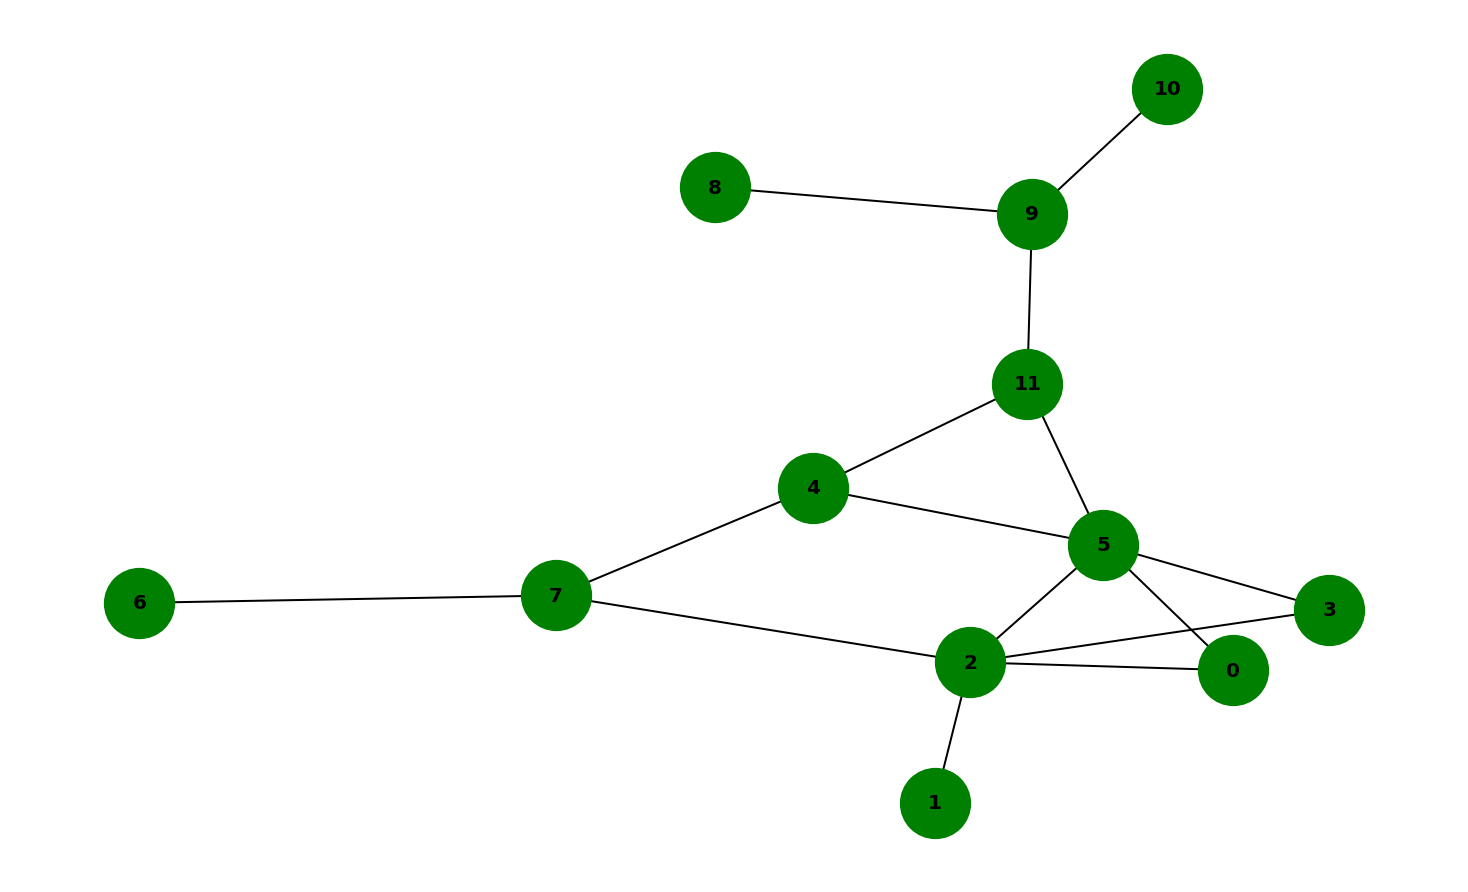

In [57]:
Gc = nx.planted_partition_graph(4, 3, 0.5, 0.1, seed=42)
#visualize the graph
pos = nx.spring_layout(Gc, seed=123)
plt.figure(figsize=(10,6))
nx.draw(Gc, pos=pos, node_size=1200, node_color='green',
        font_size=10, font_weight='bold', with_labels=True)

In [58]:
# you can get all maximal cliques in an undirected graph:
list(nx.find_cliques(Gc))

[[2, 1],
 [2, 5, 0],
 [2, 5, 3],
 [2, 7],
 [4, 11, 5],
 [4, 7],
 [6, 7],
 [8, 9],
 [9, 10],
 [9, 11]]

<div class='alert alert-warning'>
    <h4>Extra exercise 2.</h4> Indicate the maximal cliques of the ego insuline network. 

In [59]:
# xEx2)

In [60]:
#%load solutions/ex2_ex2.py

**What is the difference between a community and a cliques?**

A clique is in some sense a stronger version of a community. So, finding cliques can gelp identify communities.

In [61]:
from networkx.algorithms.community import k_clique_communities
list(k_clique_communities(Gc, 3)) # k corresponds to the size of smallest clique

[frozenset({0, 2, 3, 5}), frozenset({4, 5, 11})]

#### Are there different community detection algorithms? 

The community-finding algorithms generally optimize some parameter (usually related to the number of within-group and between-group edges). They are also generally stochastic, meaning that you may get slightly different answers on different runs. It can be useful to explore the community structure of many real-world networks, to establish substructure in the graph. Unlike cliques, there are no exact communities in a graph, rather you will get different answers depending on what algorithm you use, and what you are optimizing for.

In [62]:
import networkx.algorithms.community as nxc 

# Greedy modularity maximization begins with each node in its own community 
# and joins the pair of communities that most increases modularity until no such pair exists.
nxc.greedy_modularity_communities(Gc)

[frozenset({0, 1, 2, 3}),
 frozenset({8, 9, 10}),
 frozenset({4, 5, 11}),
 frozenset({6, 7})]

In [63]:
nxc.label_propagation_communities(Gc) # based on the label pro[agation algorithms]

dict_values([{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}])

### Node bridges

A bridge in a graph is an edge whose removal causes the number of connected components of the graph to increase. Equivalently, a bridge is an edge that does not belong to any cycle.

A common algorithm to serach for 'bridges' is based on chain decompositions.

An important ingredient of this algorithm is Depth-first search (DFS), which is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

Chain decompositions are special ear decompositions depending on a DFS-tree T of G and can be computed very simply: Let every vertex be marked as unvisited. For each vertex v in ascending DFS-numbers 1...n, traverse every backedge (i.e. every edge not in the DFS tree) that is incident to v and follow the path of tree-edges back to the root of T, stopping at the first vertex that is marked as visited. During such a traversal, every traversed vertex is marked as visited. Thus, a traversal stops at the latest at v and forms either a directed path or cycle, beginning with v; we call this path or cycle a chain. The ith chain found by this procedure is referred to as Ci. C=C1,C2,... is then a chain decomposition of G.

In [64]:
P = nx.barbell_graph(10, 0)
list(nx.bridges(P))

[(9, 10)]

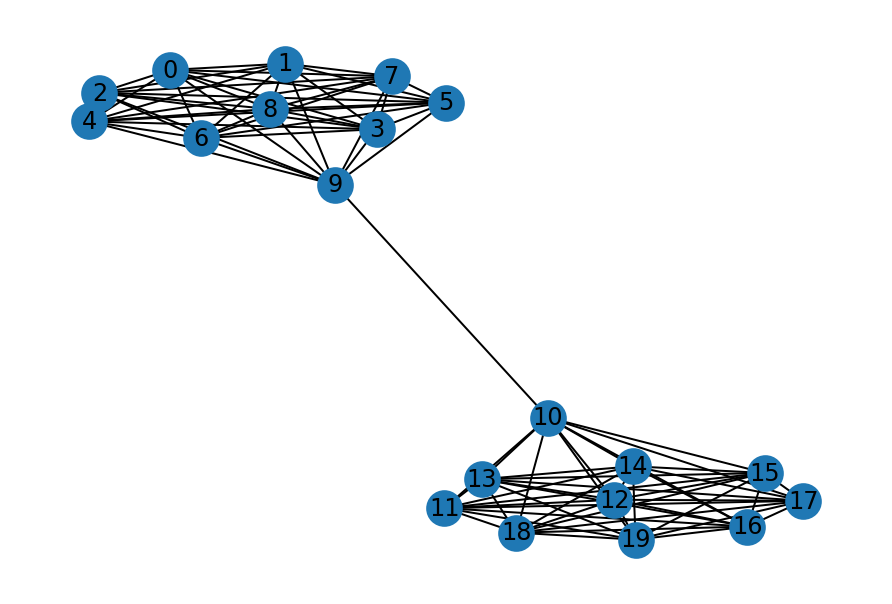

In [65]:
nx.draw(P, with_labels=True)

## Networks as matrices and arrays

We will end this notebook with demonstrating how a matrix plot of a network can be made. We use the nxviz function from MatrixPlot for this. In matrixplot first row and last column is the same node and so on.

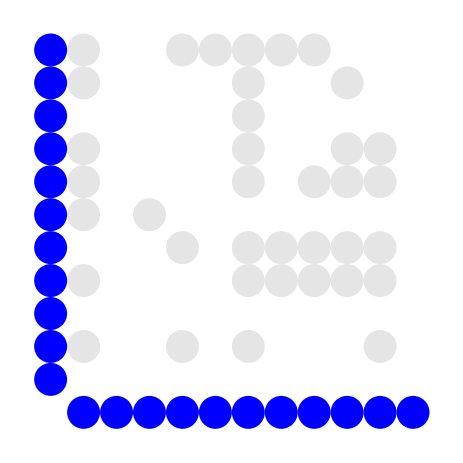

In [66]:
from nxviz import MatrixPlot
m = MatrixPlot(G)

Depending on whether or not your present network is given as a directed or undirected graph, the plot will have a symmetric or asymmetric structure. 

<div class='alert alert-warning'>
    <h4>Exercise 9. </h4>Make a new Matrixplot, but with the directed graph

In [67]:
# Ex9


In [68]:
# %load solutions/ex2_9.py

We can also use an array function from numpy to make an array of the graph instead of a matrix plot.

In [69]:
# note that the nodes might be in different order
A1 = nx.to_numpy_array(G)
A1

array([[0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

---
Next you can explore following links:

https://python.quantecon.org/sir_model.html

https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/